#                                                                Assignment 2

# Import

In [137]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


# 1. Exploratory Data Analysis

#### 1.

In [138]:
import pandas as pd

df = pd.read_csv(r"C:\Users\navin\AppData\Local\Microsoft\Windows\INetCache\IE\W42412KZ\extended_salary_data[1].csv")

print(df)



    YearsExperience     Salary
0               8.1   77884.67
1              19.1  127213.68
2              14.9  103343.52
3              12.4   88988.96
4               4.0   35214.78
5               4.0   42801.56
6               2.1   35893.61
7              17.5  128071.22
8              12.4   95436.18
9              14.5   84869.60
10              1.4   40240.84
11             19.4  123149.18
12             16.8  107230.78
13              5.0   61116.76
14              4.5   62810.00
15              4.5   61812.80
16              6.8   55607.82
17             11.0   81907.88
18              9.2   79312.63
19              6.5   72255.45
20             12.6   88208.26
21              3.7   46643.41
22              6.6   51936.65
23              8.0   58037.93
24              9.7   86625.26
25             15.9  123062.40
26              4.8   53279.90
27             10.8   94035.33
28             12.3   95116.36
29              1.9   33048.80
30             12.5   96113.96
31      

#### 2.

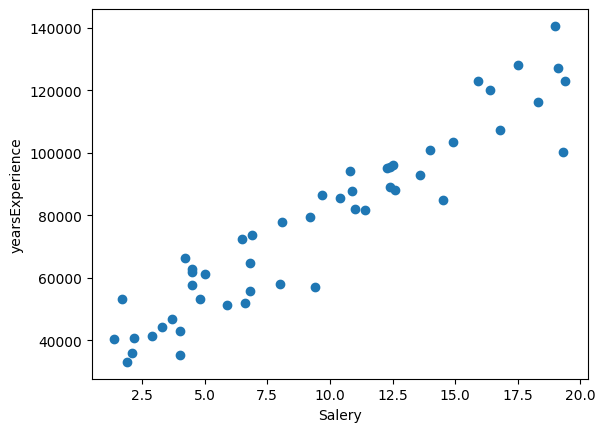

In [182]:
X = df.iloc[0:50, [0]].values
Y = df.iloc[0:50, [1]].values
plt.scatter(X, Y)

plt.xlabel("Salery")
plt.ylabel("yearsExperience")

plt.show()

#### 3.

In [140]:
df.describe()

,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000


In [141]:
df.mean()

YearsExperience        9.4800
Salary             77370.5474
dtype: float64

In [142]:
df.median()

YearsExperience        9.30
Salary             78598.65
dtype: float64

In [143]:
df.var()

YearsExperience    3.009061e+01
Salary             8.008291e+08
dtype: float64

# 2. Build a Linear Regression Model

### 1.

In [163]:
train_x = X[:40]
train_y = Y[:40]

test_x = X[40:]
test_y = Y[40:]

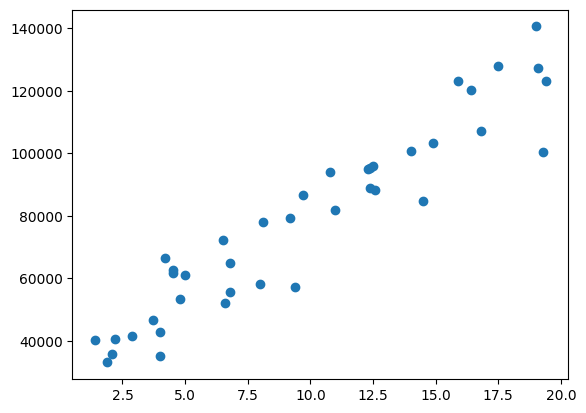

In [164]:

plt.scatter(train_x, train_y)
plt.show()

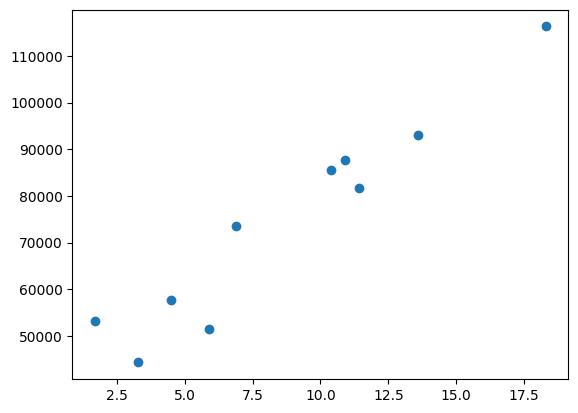

In [165]:
plt.scatter(test_x, test_y)
plt.show()

### 2.

In [147]:
from sklearn.linear_model import LinearRegression
A = LinearRegression()
A.fit(train_x, train_y)



LinearRegression()

In [148]:
y_prediction = A.predict(test_x)

### 3. 

In [149]:
A.intercept_
print(A.intercept_)
print(A.coef_)


[29576.2863726]
[[5013.77208756]]


# 3. Evaluate the Model

### 1.

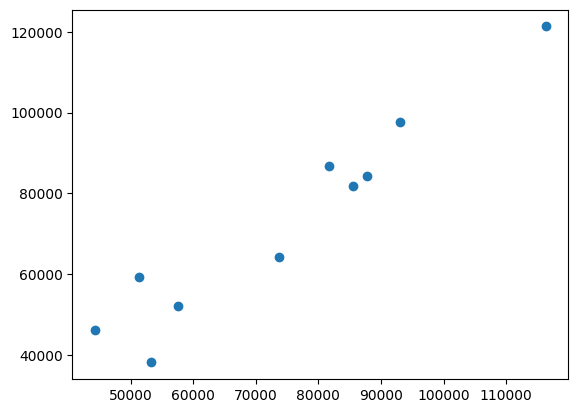

In [150]:
plt.scatter(test_y, y_prediction)

### 2.

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(test_y, y_prediction)
MAE = mean_absolute_error(test_y, y_prediction)
print("Mean Squared Errors: ", MSE)
print("MEAN ABSOLLUTE ERROR: ", MAE)

Mean Squared Errors:  51456840.03928404
MEAN ABSOLLUTE ERROR:  6195.307478490135


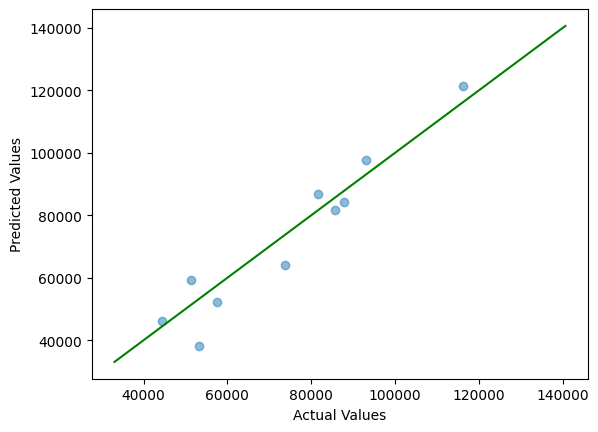

In [152]:
plt.scatter(test_y, y_prediction, alpha=0.5)
plt.plot([Y.min(), Y.max()],[Y.min(), Y.max()], color="green")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.show()

### 3.

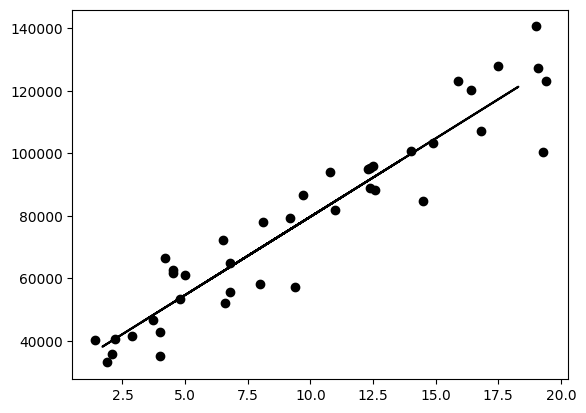

In [153]:
plt.scatter(train_x,train_y,color='k')
plt.plot(test_x, y_prediction,color='k')

plt.show()



# Bonus Task

### 1,

In [184]:
df2 = df.assign(NumProjectsCompleted = [10,18,14,11,1,3,1,15,11,11,0,20,10,3,4,2,5,11,8,6,11,3,4,7,9,15,4,11,12,2,11,2,2,21,25,16,0,1,15,1,5,12,1,20,4,14,7,10,13,6])

df2.head()

,YearsExperience,Salary,NumProjectsCompleted
0,8.1,77884.67,10
1,19.1,127213.68,18
2,14.9,103343.52,14
3,12.4,88988.96,11
4,4.0,35214.78,1


### 2.

#### without train test subset

In [166]:

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


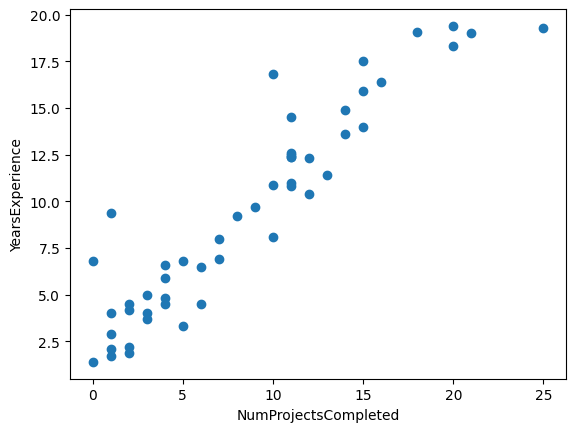

In [ ]:
Xa = df2.iloc[0:50, [2]].values
Ya = df2.iloc[0:50, [0]].values
plt.scatter(Xa, Ya,)

plt.xlabel("NumProjectsCompleted")
plt.ylabel("YearsExperience")
plt.show()

In [157]:
reg = linear_model.LinearRegression()
reg.fit(df2[['YearsExperience', 'NumProjectsCompleted']], df2.Salary)


LinearRegression()

In [158]:
reg.coef_

array([4229.65551483,  610.13900793])

In [159]:
reg.intercept_

np.float64(32050.623211568243)

In [160]:
reg.predict([[4,7]])

C:\Users\navin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53240.21832638])

#### With train test subset

In [169]:
Xab = df2.iloc[:, :-1].values
yab = df2.iloc[:, -1].values

In [176]:
X_train, X_test, y_train, y_test = train_test_split(Xab,yab, test_size=0.2, random_state=101)

In [178]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred = regressor.predict(X_test)

In [180]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [9.42135095e-01 3.05891615e-05]
Intercept: -2.793272202020516


### 3.

In [181]:

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

Mean Absolute Error: 0.770937897935043
Mean Square Error: 0.7456629794367515
Root Mean Square Error: 0.8635177933527204


### 4.

In [188]:
# Linear Regregation
MSE = mean_squared_error(test_y, y_prediction)
MAE = mean_absolute_error(test_y, y_prediction)
R2 = np.sqrt(metrics.mean_squared_error(test_y, y_prediction))
print("For Linear Regregation: ")
print("Mean Squared Errors: ", MSE)
print("MEAN ABSOLLUTE ERROR: ", MAE)
print('Root Mean Square Error:', R2)

# multiple regregation
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("For Multiple Regregation: ")
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

For Linear Regregation: 
Mean Squared Errors:  51456840.03928404
MEAN ABSOLLUTE ERROR:  6195.307478490135
Root Mean Square Error: 7173.342319956859
For Multiple Regregation: 
Mean Absolute Error: 0.770937897935043
Mean Square Error: 0.7456629794367515
Root Mean Square Error: 0.8635177933527204
